In [2]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn import preprocessing

C:\Users\ChissanuPC\AppData\Local\Temp\ipykernel_14288\4286303793.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = pd.read_csv('segmentation_data.csv')
data.head()

,ID,sex,marital_status,age,education,income,occupation,settlement_size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
data.isna().sum()

ID                 0
sex                0
marital_status     0
age                0
education          0
income             0
occupation         0
settlement_size    0
dtype: int64

In [5]:
data['income'].describe()
data['age'].describe()

count    2000.000000
mean       35.909000
std        11.719402
min        18.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        76.000000
Name: age, dtype: float64

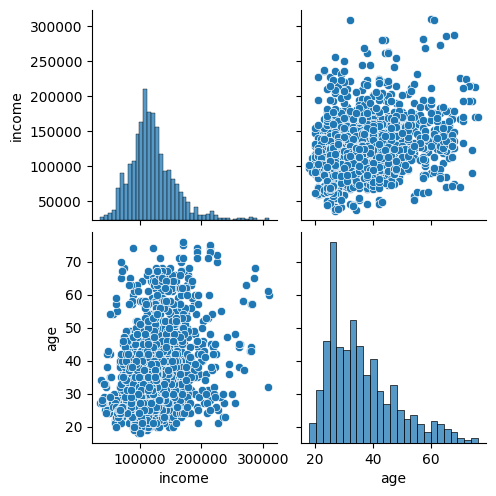

In [6]:
df_numerical = data[['income', 'age']]
sns.pairplot(df_numerical)

<Axes: >

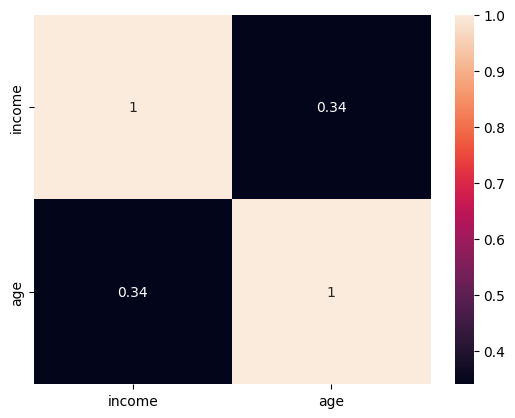

In [7]:
correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot=True)

Text(0.5, 1.0, 'Elbow Method')

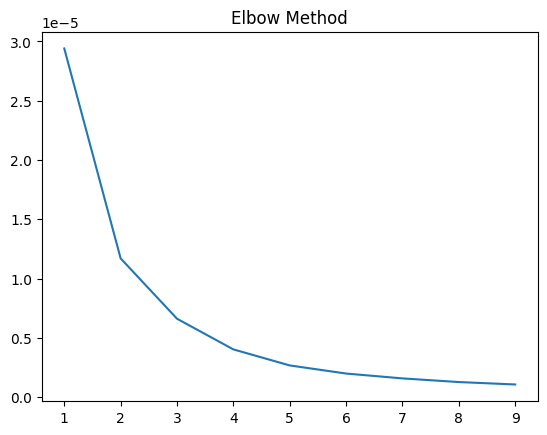

In [8]:
X = data.drop(['ID'], axis=1)
X_normalized = normalize(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

k_values = range(1, 10)
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    inertia_values.append(kmeans.inertia_)

sns.lineplot(x=k_values, y=inertia_values).set_title("Elbow Method")

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_normalized)

KMeans(n_clusters=3, random_state=42)

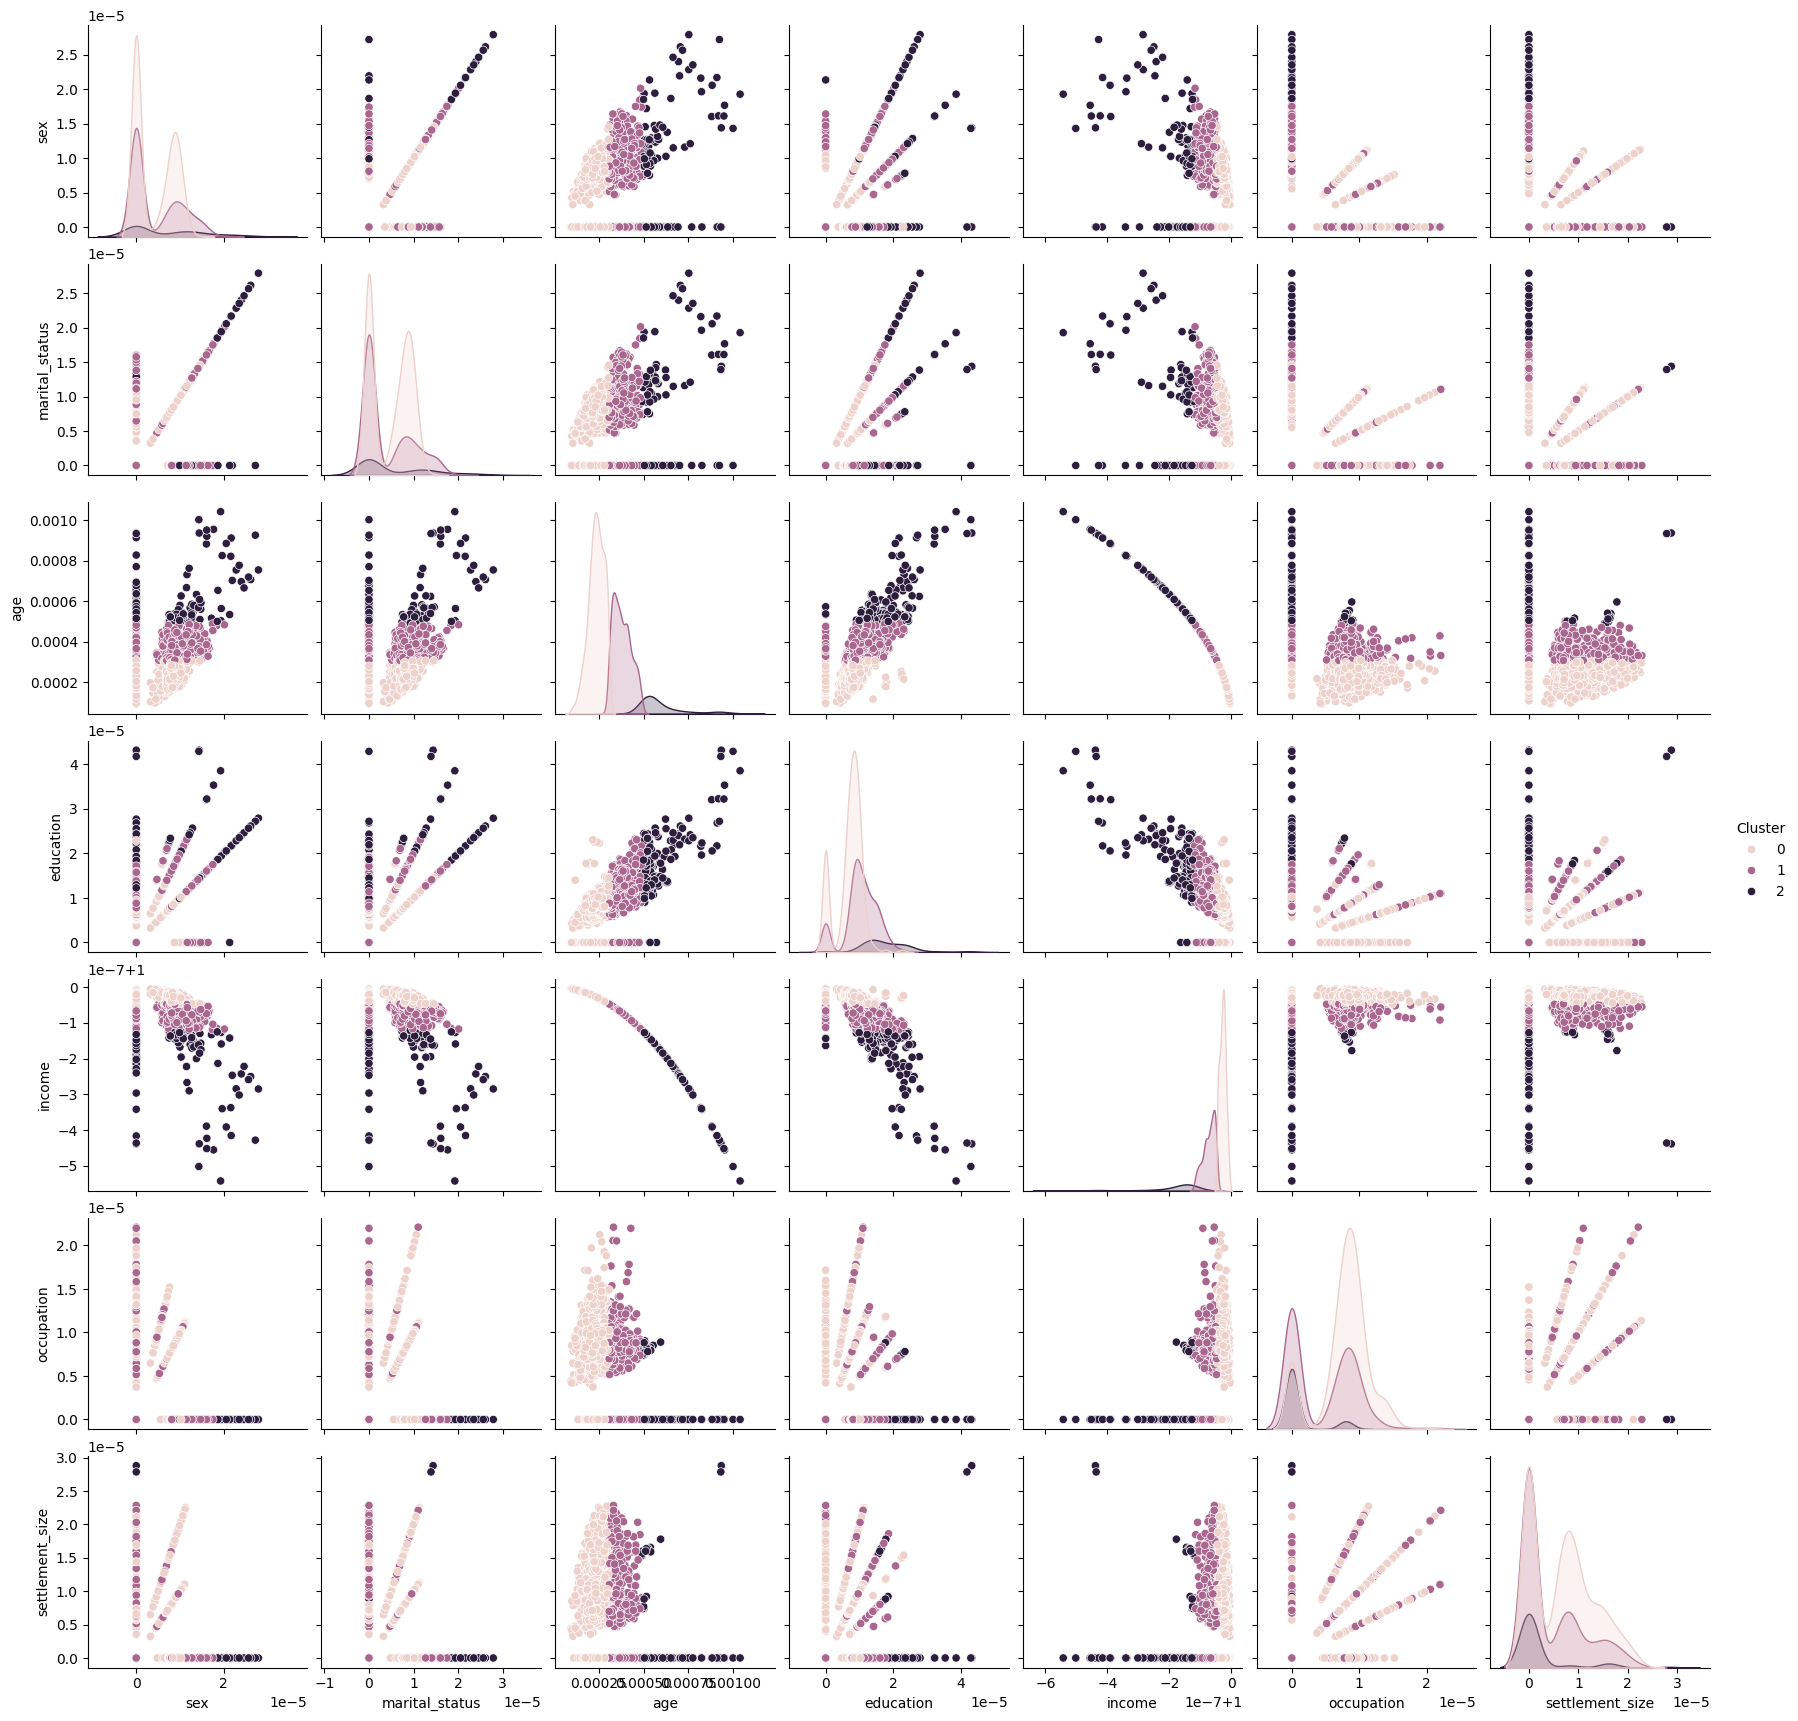

In [10]:
# Evaluate the model by plotting the clusters
X_normalized["Cluster"] = kmeans.labels_
sns.pairplot(X_normalized, hue="Cluster")

In [11]:
from sklearn.metrics import silhouette_score
silhouette_score(X_normalized, kmeans.labels_)

0.9999387358641979

In [12]:
# Evaluating the model using the Davies-Bouldin Index
# The Davies-Bouldin Index is a metric used to calculate the goodness of a clustering technique, it ranges from 0 to infinity
# 0 means that the clusters are well separated, and infinity means that the clusters are overlapping
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X_normalized, kmeans.labels_)

0.00012026954768087373